# Digit Recognizer - Kaggle excercise

### 1. Leyendo datos

In [23]:
# Importando librerias
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error

In [3]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

### 2. Analisis Exploratorio (EDA)

In [4]:
train_df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [29]:
train_df.shape

(42000, 785)

In [24]:
test_df.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
# Dsitribucion de los datos
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
# Verificando si existen valores nulos
train_df.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.1 Visualizacion de los datos

In [11]:
pixel_colnames = train_df.columns[1:]

In [12]:
pixel_colnames

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [13]:
image_values = train_df.loc[0, pixel_colnames].values
image_values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

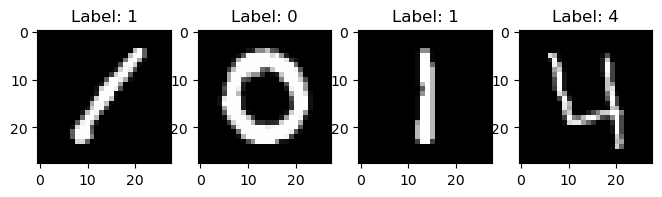

In [22]:
# Visualizando algunos datos
plt.figure(figsize=(10, 2))
for index in range(0, 4):
    plt.subplot(1, 5, 1 + index)
    image_values = train_df.loc[index, pixel_colnames].values
    image_label = train_df.loc[index, 'label']
    plt.imshow(image_values.reshape(28,28), cmap='gray') # Reshape 28 x 28 porque esto es igual al tamaño de la imagen 784 pixels
    plt.title(f'Label: {image_label}')

### 3. Preprocesamiento de los Datos


In [39]:
# Variable dependiente
y_train = train_df['label']
print(y_train.shape)
y_train.head()

# Variables independientes
features = train_df.columns[1:]
X_train = train_df[features]

X_test = test_df

X_train.head()

(42000,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



#### 3.1 Estandarizando de los datos

In [40]:
scaler = StandardScaler()

# Fit scaler
scaler.fit(X_train)

# Aplicando transformacion a los Data Set train y test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
print(X_train.shape, X_test.shape)

(42000, 784) (28000, 784)


### 4. Modelos

Modelos elegidos: 
* Regresion Logistica (Softmax Regression)
* RandomForest

#### 4.1 Softmax Regression

In [74]:
from sklearn.linear_model import LogisticRegression

# Instanciando modelo
softmax_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=5000,
    C=5,
)

# Ajustando modelo 
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=5, max_iter=5000, multi_class='multinomial')

In [75]:
softmax_reg.intercept_

array([ -5.72660674, -15.89025959,   5.52982824,   5.9498545 ,
         0.42479802,   7.02706182,  -3.67250743,  -3.2553471 ,
         7.71547343,   1.89770486])

In [76]:
print(softmax_reg.coef_.shape)
softmax_reg.coef_[4:8, 110:120]

(10, 784)


array([[-1.14152087e-04,  0.00000000e+00,  0.00000000e+00,
        -9.84617962e-05, -5.39270397e-04, -1.01642242e-01,
         1.65419258e-01,  5.19932937e-01,  7.06266899e-02,
         1.82594677e-01],
       [-2.32217506e-02,  0.00000000e+00,  0.00000000e+00,
        -3.04010564e-03, -3.69288325e-02, -4.76656829e-03,
        -6.11386634e-01,  1.68130864e-01,  6.45144686e-01,
        -2.50645636e-03],
       [ 4.74200719e-02,  0.00000000e+00,  0.00000000e+00,
         8.28348855e-04,  4.65283286e-04, -4.96516397e-03,
         1.94822466e-01,  2.14502000e-01,  3.49438586e-01,
        -4.31404424e-01],
       [-1.08460338e-04,  0.00000000e+00,  0.00000000e+00,
        -1.10794212e-04, -2.00312612e-04,  4.15315809e-01,
         3.12524763e-01,  2.91373398e-01, -1.63745340e+00,
         3.52081075e-01]])

### 4.2 Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier


# Instanciando modelo 
rand_forest_clf = RandomForestClassifier(random_state=0)

# Ajustando modelo
rand_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### 5. Evaluación

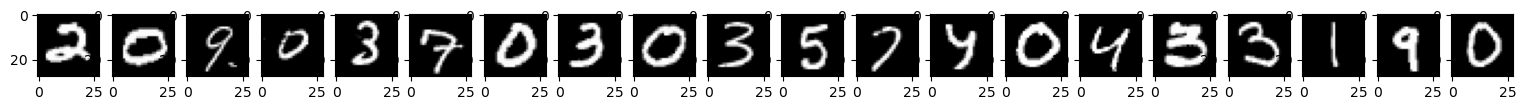

In [105]:
# Visualizando algunos datos del Data set de prueba
plt.figure(figsize=(20, 10))
for index in range(0, 20):
    plt.subplot(1, 21, 1 + index)
    image_values = test_df.loc[index, pixel_colnames].values
    plt.imshow(image_values.reshape(28,28), cmap='gray') # Reshape 28 x 28 porque esto es igual al tamaño de la imagen 784 pixels

#### 5.1 Predicciones

In [78]:
# Calculando la precision sobre el Data set de entrenamiento
accuracy = softmax_reg.score(X_train, y_train)
print(f'Softmax Regression accuracy={accuracy:.3f}')

Softmax Regression accuracy=0.953


In [102]:
# Haciendo predicciones
Y_pred_softmax = softmax_reg.predict(X_test)
Y_pred_softmax[0:20]

array([2, 0, 9, 7, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 5, 3, 1, 9, 0])

In [90]:
# Calculano la precision sobre el Data set de entrenamiento
accuracy = rand_forest_clf.score(X_train, y_train)
print(f'Random Forest accuracy={accuracy}')

Random Forest accuracy=1.0


In [91]:
# Haciendo predicciones
Y_pred_rand_forest = rand_forest_clf.predict(X_test)
Y_pred_rand_forest[0:20]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0])

### Exportacion a CSV

In [100]:
# Para descargar en ordenador en el formato que requiere Kaggle
def download_output(y_pred, name):
    output = pd.DataFrame({
        'ImageId' : test_df.index + 1,
        'Label': y_pred
    })
    output.to_csv(name, index=False)

In [101]:
download_output(Y_pred_softmax, 'digit_recognizer_softmax_pred.csv')
download_output(Y_pred_rand_forest, 'digit_recognizer_rand_forest_pred.csv')